In [1]:
%run utils.ipynb

In [3]:
hits, cells, particles, truth = load_data_single_event(1050)
hits_trans = trans_to_cylindrical (hits)

In [39]:
def is_cylinder (volume_id, layer_id):
    return (((volume_id == 8 or volume_id == 13) and layer_id in [2,4,6,8])
           or (volume_id == 17 and layer_id in [2,4]))

In [28]:
def layer_number (volume_id, layer_id):
    assert (volume_id in [8, 13, 17]), "This volume_id is not in a cylinder!"
    assert (((volume_id == 8 or volume_id == 13) and layer_id in [2,4,6,8])
           or (volume_id == 17 and layer_id in [2,4])), "This layer_id is not in this volume_id"
    diction = {(8,2):1, (8,4):2, (8,6):3, (8,8):4, (13,2):5, (13,4):6, (13,6):7, (13,8):8, (17,2):9, (17,4):10}
    return diction[(volume_id, layer_id)]

In [18]:
def radius_of_cylinder (l):
    layer_dict = {1:(8,2), 2:(8,4), 3:(8,6), 4:(8,8), 5:(13,2), 6:(13,4), 7:(13,6), 8:(13,8), 9:(17,2), 10:(17,4)}
    (volume_id, layer_id) = layer_dict[l]
    assert (volume_id in [8, 13, 17]), "This volume_id is not in a cylinder!"
    assert (((volume_id == 8 or volume_id == 13) and layer_id in [2,4,6,8])
           or (volume_id == 17 and layer_id in [2,4])), "This layer_id is not in this volume_id"
    hits_this_layer = hits_trans.loc[(hits_trans['volume_id'] == volume_id) & (hits_trans['layer_id'] == layer_id)]
    return np.average (hits_this_layer['r'].values)

In [49]:
def layer_spacing_shift (hits_trans):
    hits_trans_info = []
    for row in hits_trans.itertuples():
        hit_id = row.__getattribute__('hit_id')
        r = row.__getattribute__('r')
        phi = row.__getattribute__('phi')
        z = row.__getattribute__('z')
        volume_id = row.__getattribute__('volume_id')
        layer_id = row.__getattribute__('layer_id')
        if (not is_cylinder (volume_id, layer_id)):
            continue
        l = layer_number (volume_id, layer_id)
        z = l/r*z
        r = l
        hits_trans_info.append([hit_id, r, phi, z, volume_id, layer_id])
    hits_trans_shifted = pd.DataFrame (hits_trans_info, columns=["hit_id", "r", "phi", "z", "volume_id", "layer_id"])
    return hits_trans_shifted

In [50]:
hits_trans_shifted = layer_spacing_shift (hits_trans)

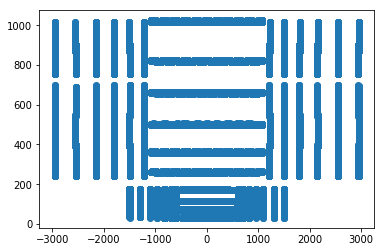

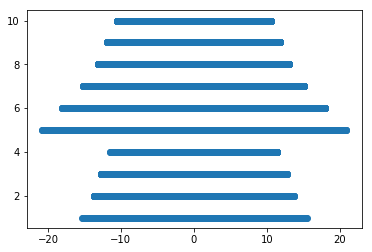

In [58]:
r = hits_trans['r'].values
z = hits_trans['z'].values
plt.scatter (z,r)
plt.show()
r = hits_trans_shifted['r'].values
z = hits_trans_shifted['z'].values
plt.scatter (z,r)
plt.show()